In [121]:
import numpy
import pandas
from scipy import stats
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [30]:
def get_counts(sequence):
    count={}
    for x in sequence:
        if(x in count):
            count[x]+=1
        else:
            count[x]=1
    return count        

In [2]:
csv_data=pandas.read_csv('~/Downloads/wine-reviews/winemag-data-130k-v2.csv')

In [37]:
dt=csv_data.T
region1=dt.values[7]
#p=pandas.DataFrame(region1)
count=get_counts(region1)
count = sorted(count.items(),key=lambda item:item[1],reverse=True)
count[0:10]

[(nan, 21247),
 ('Napa Valley', 4480),
 ('Columbia Valley (WA)', 4124),
 ('Russian River Valley', 3091),
 ('California', 2629),
 ('Paso Robles', 2350),
 ('Willamette Valley', 2301),
 ('Mendoza', 2301),
 ('Alsace', 2163),
 ('Champagne', 1613)]

In [26]:
dt=csv_data.T
price=dt.values[5]
q=pandas.DataFrame(price).astype('float64')
print(q.describe(include='all'))
print(p.isna().sum())

                   0
count  120975.000000
mean       35.363389
std        41.022218
min         4.000000
25%        17.000000
50%        25.000000
75%        42.000000
max      3300.000000
0    8996
dtype: int64


((array([-4.38762881, -4.19065053, -4.08357623, ...,  4.08357623,
          4.19065053,  4.38762881]),
  array([   4.,    4.,    4., ..., 2500., 2500., 3300.])),
 (26.993976478818105, 35.36338912998554, 0.6580115872492234))

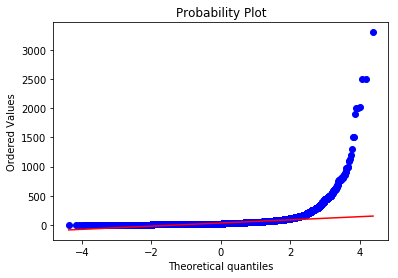

In [63]:
dt=csv_data
price=dt['price']
price=region1.dropna(axis=0,how='all')
price
stats.probplot(region1, dist="norm", plot=plt)

In [65]:
data = [go.Box(y=price)]
plotly.offline.plot(data)  # 盒图

'file:///Users/maxu/Desktop/temp-plot.html'

In [100]:
dt=csv_data
price=dt['price']
price1=price.dropna(axis=0,how='all').astype('float64').values.reshape(1,-1)
imp_mean = SimpleImputer(missing_values='NaN', strategy='mean')
#Fit = imp_mean.fit(price1)
#new_data = imp_mean.transform(price)
price1

array([[15., 14., 13., ..., 30., 32., 21.]])

In [106]:
dt=csv_data
price=dt['price']
price_after=price.fillna(price.mean())
price_after

0         35.363389
1         15.000000
2         14.000000
3         13.000000
4         65.000000
5         15.000000
6         16.000000
7         24.000000
8         12.000000
9         27.000000
10        19.000000
11        30.000000
12        34.000000
13        35.363389
14        12.000000
15        24.000000
16        30.000000
17        13.000000
18        28.000000
19        32.000000
20        23.000000
21        20.000000
22        19.000000
23        22.000000
24        35.000000
25        69.000000
26        13.000000
27        10.000000
28        17.000000
29        16.000000
            ...    
129941    20.000000
129942    35.000000
129943    29.000000
129944    25.000000
129945    20.000000
129946    17.000000
129947    20.000000
129948    43.000000
129949    35.000000
129950    35.000000
129951    30.000000
129952    22.000000
129953    25.000000
129954    15.000000
129955    40.000000
129956    19.000000
129957    17.000000
129958    35.000000
129959    57.000000


In [120]:
origin = go.Box(
    y=price
)
mean_fill = go.Box(
    y=price_after
)
data = [origin, mean_fill]
plotly.offline.plot(data)

'file:///Users/maxu/Desktop/temp-plot.html'